<a href="https://colab.research.google.com/github/khadijabendib/Analyse-des-sentiments/blob/main/Analyse_des_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy
import pandas as pd
import xml.etree.ElementTree as ET
from nltk.stem import WordNetLemmatizer

•	J’ai utilisé la bibliothèque Python ElementTree pour extraire des données à partir du fichier XML appelé "Restaurants_Train.xml" et j’ai stocké ces données dans un DataFrame de pandas :

In [ ]:
tree1 = ET.parse("./Restaurants_Train.xml")
root1 = tree1.getroot()

data = []
for sentence in root1.findall('sentence'):
    idi = sentence.get('id')
    text=sentence.find('text').text
    for neighbor in sentence.iter('aspectTerm'):
      neighbor.attrib['idi']=idi
      neighbor.attrib['text']=text
      data.append(neighbor.attrib)

df1=pd.DataFrame(data)
df1.head(1)

,term,polarity,from,to,idi,text
0,staff,negative,8,13,3121,But the staff was so horrible to us.


In [ ]:
nlp = spacy.load('en_core_web_sm')
# tokenization
df1['token_text'] = df1.apply(lambda row: nlp(row["text"]), axis=1)
# print(df['token_text'] )
df1

,term,polarity,from,to,idi,text,token_text
0,staff,negative,8,13,3121,But the staff was so horrible to us.,"(But, the, staff, was, so, horrible, to, us, .)"
1,food,positive,57,61,2777,"To be completely fair, the only redeeming fact...","(To, be, completely, fair, ,, the, only, redee..."
2,food,positive,4,8,1634,"The food is uniformly exceptional, with a very...","(The, food, is, uniformly, exceptional, ,, wit..."
3,kitchen,positive,55,62,1634,"The food is uniformly exceptional, with a very...","(The, food, is, uniformly, exceptional, ,, wit..."
4,menu,neutral,141,145,1634,"The food is uniformly exceptional, with a very...","(The, food, is, uniformly, exceptional, ,, wit..."
...,...,...,...,...,...,...,...
3688,pot of boiling water,neutral,17,37,671,Each table has a pot of boiling water sunken i...,"(Each, table, has, a, pot, of, boiling, water,..."
3689,meats,neutral,99,104,671,Each table has a pot of boiling water sunken i...,"(Each, table, has, a, pot, of, boiling, water,..."
3690,vegetables,neutral,114,124,671,Each table has a pot of boiling water sunken i...,"(Each, table, has, a, pot, of, boiling, water,..."
3691,rice,neutral,130,134,671,Each table has a pot of boiling water sunken i...,"(Each, table, has, a, pot, of, boiling, water,..."


•	La bibliothèque Python Spacy pour effectuer la tokenisation sur les données textuelles contenues dans un data frame :

In [ ]:
pos_tags = []
for doc in df1['token_text']:
    pos_tags_doc = [(token.text, token.pos_) for token in doc]
    pos_tags.append(pos_tags_doc)
print(pos_tags)

[[('But', 'CCONJ'), ('the', 'DET'), ('staff', 'NOUN'), ('was', 'AUX'), ('so', 'ADV'), ('horrible', 'ADJ'), ('to', 'ADP'), ('us', 'PRON'), ('.', 'PUNCT')], [('To', 'PART'), ('be', 'AUX'), ('completely', 'ADV'), ('fair', 'ADJ'), (',', 'PUNCT'), ('the', 'DET'), ('only', 'ADJ'), ('redeeming', 'VERB'), ('factor', 'NOUN'), ('was', 'AUX'), ('the', 'DET'), ('food', 'NOUN'), (',', 'PUNCT'), ('which', 'PRON'), ('was', 'AUX'), ('above', 'ADP'), ('average', 'ADJ'), (',', 'PUNCT'), ('but', 'CCONJ'), ('could', 'AUX'), ("n't", 'PART'), ('make', 'VERB'), ('up', 'ADP'), ('for', 'ADP'), ('all', 'DET'), ('the', 'DET'), ('other', 'ADJ'), ('deficiencies', 'NOUN'), ('of', 'ADP'), ('Teodora', 'PROPN'), ('.', 'PUNCT')], [('The', 'DET'), ('food', 'NOUN'), ('is', 'AUX'), ('uniformly', 'ADV'), ('exceptional', 'ADJ'), (',', 'PUNCT'), ('with', 'ADP'), ('a', 'DET'), ('very', 'ADV'), ('capable', 'ADJ'), ('kitchen', 'NOUN'), ('which', 'PRON'), ('will', 'AUX'), ('proudly', 'ADV'), ('whip', 'VERB'), ('up', 'ADP'), ('wh

la meme chose ici:

In [ ]:
tree2 = ET.parse("./Restaurants_Test_Gold.xml")
root2 = tree2.getroot()

data = []
for sentence in root2.findall('sentence'):
    idi = sentence.get('id')
    text=sentence.find('text').text
    for neighbor in sentence.iter('aspectTerm'):
      neighbor.attrib['idi']=idi
      neighbor.attrib['text']=text
      data.append(neighbor.attrib)

df2=pd.DataFrame(data)
df2.head(1)

,term,polarity,from,to,idi,text
0,appetizers,positive,8,18,813,"All the appetizers and salads were fabulous, t..."


In [ ]:
nlp = spacy.load('en_core_web_sm')
# tokenization
df2['token_text'] = df2.apply(lambda row: nlp(row["text"]), axis=1)
# print(df2['token_text'] )
df2

,term,polarity,from,to,idi,text,token_text
0,appetizers,positive,8,18,813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
1,salads,positive,23,29,813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
2,steak,positive,49,54,813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
3,pasta,positive,82,87,813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
4,portions,positive,17,25,1579,And really large portions.,"(And, really, large, portions, .)"
...,...,...,...,...,...,...,...
91,sardines with biscuits,positive,77,99,2912,"The dishes offered were unique, very tasty and...","(The, dishes, offered, were, unique, ,, very, ..."
92,large whole shrimp,positive,101,119,2912,"The dishes offered were unique, very tasty and...","(The, dishes, offered, were, unique, ,, very, ..."
93,pistachio ice cream,positive,135,154,2912,"The dishes offered were unique, very tasty and...","(The, dishes, offered, were, unique, ,, very, ..."
94,office lunch,neutral,18,30,3188,Went there for an office lunch.,"(Went, there, for, an, office, lunch, .)"


•	J’ai utilisé le résultat de la tokenisation effectuée par Spacy pour extraire les étiquettes de partie du discours (POS) de chaque token dans un dataframe :

In [ ]:
pos_tags2 = []
for doc in df2['token_text']:
    pos_tags_doc = [(token.text, token.pos_) for token in doc]
    pos_tags.append(pos_tags_doc)
print(pos_tags)

[[('But', 'CCONJ'), ('the', 'DET'), ('staff', 'NOUN'), ('was', 'AUX'), ('so', 'ADV'), ('horrible', 'ADJ'), ('to', 'ADP'), ('us', 'PRON'), ('.', 'PUNCT')], [('To', 'PART'), ('be', 'AUX'), ('completely', 'ADV'), ('fair', 'ADJ'), (',', 'PUNCT'), ('the', 'DET'), ('only', 'ADJ'), ('redeeming', 'VERB'), ('factor', 'NOUN'), ('was', 'AUX'), ('the', 'DET'), ('food', 'NOUN'), (',', 'PUNCT'), ('which', 'PRON'), ('was', 'AUX'), ('above', 'ADP'), ('average', 'ADJ'), (',', 'PUNCT'), ('but', 'CCONJ'), ('could', 'AUX'), ("n't", 'PART'), ('make', 'VERB'), ('up', 'ADP'), ('for', 'ADP'), ('all', 'DET'), ('the', 'DET'), ('other', 'ADJ'), ('deficiencies', 'NOUN'), ('of', 'ADP'), ('Teodora', 'PROPN'), ('.', 'PUNCT')], [('The', 'DET'), ('food', 'NOUN'), ('is', 'AUX'), ('uniformly', 'ADV'), ('exceptional', 'ADJ'), (',', 'PUNCT'), ('with', 'ADP'), ('a', 'DET'), ('very', 'ADV'), ('capable', 'ADJ'), ('kitchen', 'NOUN'), ('which', 'PRON'), ('will', 'AUX'), ('proudly', 'ADV'), ('whip', 'VERB'), ('up', 'ADP'), ('wh

insertion d'un colonne dans chaque dataframe:


In [ ]:
df1.insert(4,"sentiment_word"," ")
df2.insert(4,"sentiment_word"," ")
df2

,term,polarity,from,to,sentiment_word,idi,text,token_text
0,appetizers,positive,8,18,,813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
1,salads,positive,23,29,,813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
2,steak,positive,49,54,,813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
3,pasta,positive,82,87,,813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
4,portions,positive,17,25,,1579,And really large portions.,"(And, really, large, portions, .)"
...,...,...,...,...,...,...,...,...
91,sardines with biscuits,positive,77,99,,2912,"The dishes offered were unique, very tasty and...","(The, dishes, offered, were, unique, ,, very, ..."
92,large whole shrimp,positive,101,119,,2912,"The dishes offered were unique, very tasty and...","(The, dishes, offered, were, unique, ,, very, ..."
93,pistachio ice cream,positive,135,154,,2912,"The dishes offered were unique, very tasty and...","(The, dishes, offered, were, unique, ,, very, ..."
94,office lunch,neutral,18,30,,3188,Went there for an office lunch.,"(Went, there, for, an, office, lunch, .)"


Insertion d'un colonne dans les deux data frame:

In [ ]:
df1.insert(5,"score_word"," ")
df2.insert(5,"score_word"," ")
df2

,term,polarity,from,to,sentiment_word,score_word,idi,text,token_text
0,appetizers,positive,8,18,,,813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
1,salads,positive,23,29,,,813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
2,steak,positive,49,54,,,813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
3,pasta,positive,82,87,,,813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
4,portions,positive,17,25,,,1579,And really large portions.,"(And, really, large, portions, .)"
...,...,...,...,...,...,...,...,...,...
91,sardines with biscuits,positive,77,99,,,2912,"The dishes offered were unique, very tasty and...","(The, dishes, offered, were, unique, ,, very, ..."
92,large whole shrimp,positive,101,119,,,2912,"The dishes offered were unique, very tasty and...","(The, dishes, offered, were, unique, ,, very, ..."
93,pistachio ice cream,positive,135,154,,,2912,"The dishes offered were unique, very tasty and...","(The, dishes, offered, were, unique, ,, very, ..."
94,office lunch,neutral,18,30,,,3188,Went there for an office lunch.,"(Went, there, for, an, office, lunch, .)"


In [ ]:
def penn_to_wn(tag):
 if tag.startswith('J'):
  return wn.ADJ
 elif tag.startswith('N'):
   return wn.NOUN
 elif tag.startswith('R'):
   return wn.ADV
 elif tag.startswith('V'):
   return wn.VERB
 return None

lemmatizer = WordNetLemmatizer()

def get_sentiment(word,tag):
 wn_tag = penn_to_wn(tag)
 if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
     return []
 lemma = lemmatizer.lemmatize(word, pos=wn_tag)
 if not lemma:
   return []
 synsets = wn.synsets(word, pos=wn_tag)
 if not synsets:
    return []
# Prend le premier sens du mot c'est à dire le sens le plus commun
 synset = synsets[0]
 swn_synset = swn.senti_synset(synset.name())
 return [swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

j'importe les mots vides (stopwords) en anglais depuis la bibliothèque NLTK. Ensuite, je crée une instance de la classe PorterStemmer dans la deuxième ligne, qui est utilisée pour le racinisation (stemming) des mots.

Je parcours tous les tokens de la colonne 'text' de la variable df1 en utilisant une boucle for. Pour diviser chaque phrase en une liste de tokens, j'utilise la méthode word_tokenize() .Ensuite, je filtre la liste des tokens pour exclure les mots vides à l'aide de la méthode stopwords.words(). Les mots restants sont stockés dans une liste appelée "tokens".

J'utilise ensuite la méthode pos_tag() pour étiqueter chaque token avec sa partie du discours correspondante. La liste de tuples (token, partie du discours) est stockée dans la variable pos_val.

Pour chaque tuple dans pos_val, j'appelle la fonction get_sentiment() pour récupérer le score de sentiment du mot. Le score de sentiment est stocké dans une liste appelée "score_word", et le mot est stocké dans une liste appelée "sentiment_word".

Enfin, j'ajoute les listes "score_word" et "sentiment_word" aux colonnes "score_word" et "sentiment_word" de la variable df1 pour chaque ligne, respectivement. J'utilise la variable "i" pour parcourir les lignes de la variable df1.

In [ ]:
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import wordnet as wn
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from nltk.corpus import sentiwordnet as swn
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')

from nltk.corpus import stopwords
ps=PorterStemmer()
i=0
for token in df1.text:
  words=nltk.word_tokenize(str(token))
  tokens=[word for word in words if not word in stopwords.words()]
  pos_val=nltk.pos_tag(tokens)

  score_word=[]
  sentiment_word=[]
  for (x,y) in pos_val:
      m=get_sentiment(x,y)
      score_word.append(m)
      sentiment_word.append(x)
      df1['sentiment_word'][i]=sentiment_word
      df1['score_word'][i]=score_word
      i+=1
df1.head(10)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]

,term,polarity,from,to,sentiment_word,score_word,idi,text,token_text
0,staff,negative,8,13,"[But, staff, horrible, .]","[[], [0.0, 0.0, 1.0], [0.0, 0.625, 0.375], []]",3121,But the staff was so horrible to us.,"(But, the, staff, was, so, horrible, to, us, .)"
1,food,positive,57,61,"[But, staff, horrible, .]","[[], [0.0, 0.0, 1.0], [0.0, 0.625, 0.375], []]",2777,"To be completely fair, the only redeeming fact...","(To, be, completely, fair, ,, the, only, redee..."
2,food,positive,4,8,"[But, staff, horrible, .]","[[], [0.0, 0.0, 1.0], [0.0, 0.625, 0.375], []]",1634,"The food is uniformly exceptional, with a very...","(The, food, is, uniformly, exceptional, ,, wit..."
3,kitchen,positive,55,62,"[But, staff, horrible, .]","[[], [0.0, 0.0, 1.0], [0.0, 0.625, 0.375], []]",1634,"The food is uniformly exceptional, with a very...","(The, food, is, uniformly, exceptional, ,, wit..."
4,menu,neutral,141,145,"[To, completely, fair, ,, redeeming, factor, f...","[[], [0.5, 0.0, 0.5], [0.625, 0.0, 0.375], [],...",1634,"The food is uniformly exceptional, with a very...","(The, food, is, uniformly, exceptional, ,, wit..."
5,food,positive,17,21,"[To, completely, fair, ,, redeeming, factor, f...","[[], [0.5, 0.0, 0.5], [0.625, 0.0, 0.375], [],...",2846,"Not only was the food outstanding, but the lit...","(Not, only, was, the, food, outstanding, ,, bu..."
6,perks,positive,51,56,"[To, completely, fair, ,, redeeming, factor, f...","[[], [0.5, 0.0, 0.5], [0.625, 0.0, 0.375], [],...",2846,"Not only was the food outstanding, but the lit...","(Not, only, was, the, food, outstanding, ,, bu..."
7,orrechiete with sausage and chicken,positive,27,62,"[To, completely, fair, ,, redeeming, factor, f...","[[], [0.5, 0.0, 0.5], [0.625, 0.0, 0.375], [],...",1458,Our agreed favorite is the orrechiete with sau...,"(Our, agreed, favorite, is, the, orrechiete, w..."
8,waiters,positive,76,83,"[To, completely, fair, ,, redeeming, factor, f...","[[], [0.5, 0.0, 0.5], [0.625, 0.0, 0.375], [],...",1458,Our agreed favorite is the orrechiete with sau...,"(Our, agreed, favorite, is, the, orrechiete, w..."
9,meats,neutral,152,157,"[To, completely, fair, ,, redeeming, factor, f...","[[], [0.5, 0.0, 0.5], [0.625, 0.0, 0.375], [],...",1458,Our agreed favorite is the orrechiete with sau...,"(Our, agreed, favorite, is, the, orrechiete, w..."


la meme chose ici:

In [ ]:
from nltk.corpus import stopwords
ps=PorterStemmer()
i=0
for token in df2.text:
  words=nltk.word_tokenize(str(token))
  tokens=[word for word in words if not word in stopwords.words()]
  pos_val=nltk.pos_tag(tokens)

  score_word=[]
  sentiment_word=[]
  for (x,y) in pos_val:
      m=get_sentiment(x,y)
      score_word.append(m)
      sentiment_word.append(x)
      df2['sentiment_word'][i]=sentiment_word
      df2['score_word'][i]=score_word
      i+=1
df2.head(10)

,term,polarity,from,to,sentiment_word,score_word,idi,text,token_text
0,appetizers,positive,8,18,"[All, appetizers, salads, fabulous, ,, steak, ...","[[], [0.0, 0.0, 1.0], [], [0.875, 0.125, 0.0],...",813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
1,salads,positive,23,29,"[All, appetizers, salads, fabulous, ,, steak, ...","[[], [0.0, 0.0, 1.0], [], [0.875, 0.125, 0.0],...",813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
2,steak,positive,49,54,"[All, appetizers, salads, fabulous, ,, steak, ...","[[], [0.0, 0.0, 1.0], [], [0.875, 0.125, 0.0],...",813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
3,pasta,positive,82,87,"[All, appetizers, salads, fabulous, ,, steak, ...","[[], [0.0, 0.0, 1.0], [], [0.875, 0.125, 0.0],...",813,"All the appetizers and salads were fabulous, t...","(All, the, appetizers, and, salads, were, fabu..."
4,portions,positive,17,25,"[All, appetizers, salads, fabulous, ,, steak, ...","[[], [0.0, 0.0, 1.0], [], [0.875, 0.125, 0.0],...",1579,And really large portions.,"(And, really, large, portions, .)"
5,sweet lassi,positive,4,15,"[All, appetizers, salads, fabulous, ,, steak, ...","[[], [0.0, 0.0, 1.0], [], [0.875, 0.125, 0.0],...",2882,The sweet lassi was excellent as was the lamb ...,"(The, sweet, lassi, was, excellent, as, was, t..."
6,lamb chettinad,positive,41,55,"[All, appetizers, salads, fabulous, ,, steak, ...","[[], [0.0, 0.0, 1.0], [], [0.875, 0.125, 0.0],...",2882,The sweet lassi was excellent as was the lamb ...,"(The, sweet, lassi, was, excellent, as, was, t..."
7,garlic naan,positive,64,75,"[All, appetizers, salads, fabulous, ,, steak, ...","[[], [0.0, 0.0, 1.0], [], [0.875, 0.125, 0.0],...",2882,The sweet lassi was excellent as was the lamb ...,"(The, sweet, lassi, was, excellent, as, was, t..."
8,rasamalai,negative,84,93,"[All, appetizers, salads, fabulous, ,, steak, ...","[[], [0.0, 0.0, 1.0], [], [0.875, 0.125, 0.0],...",2882,The sweet lassi was excellent as was the lamb ...,"(The, sweet, lassi, was, excellent, as, was, t..."
9,Service,positive,0,7,"[All, appetizers, salads, fabulous, ,, steak, ...","[[], [0.0, 0.0, 1.0], [], [0.875, 0.125, 0.0],...",1609,Service was quick.,"(Service, was, quick, .)"


In [ ]:
df1.insert(5,"PoS_tagger"," ")
for i in range(len(df1.PoS_tagger)):
  df1['PoS_tagger'][i]=[(X.pos_) for X in df1.token_text[i]]
  

j'ai ajouté  une colonne "PoS_tagger" à "df1", qui contient les parties du discours pour chaque mot dans la colonne "token_text".

In [ ]:
for i in range(len(df1.PoS_tagger)):
  df1['PoS_tagger'][i]=[(X.pos_) for X in df1.token_text[i]]
  df1

In [ ]:
df2.insert(5,"PoS_tagger"," ")
for i in range(len(df2.PoS_tagger)):
  df2['PoS_tagger'][i]=[(X.pos_) for X in df2.token_text[i]]
  

cette histogrammes représente les données des dataframes



(array([[ 805.,    0.,    0., 2164.,    0.,    0.,  633.,    0.,    0.,
           91.],
        [  18.,    0.,    0.,   68.,    0.,    0.,   10.,    0.,    0.,
            0.]]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 2 BarContainer objects>)

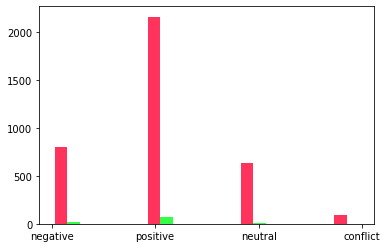

In [ ]:
import matplotlib.pyplot as plt

plt.hist([df1['polarity'], df2['polarity']], color=['#FF335B', '#33FF46'], label=['Restaurants_Train', 'Restaurants_Test_Gold'])

j'ai supprimé la colonne conflict

In [ ]:
df1 = df1[df1['polarity'] !="conflict"]

In [ ]:
df1

,term,polarity,from,to,sentiment_word,PoS_tagger,score_word,idi,text,token_text
0,staff,negative,8,13,"[But, staff, horrible, .]","[CCONJ, DET, NOUN, AUX, ADV, ADJ, ADP, PRON, P...","[[], [0.0, 0.0, 1.0], [0.0, 0.625, 0.375], []]",3121,But the staff was so horrible to us.,"(But, the, staff, was, so, horrible, to, us, .)"
1,food,positive,57,61,"[But, staff, horrible, .]","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N...","[[], [0.0, 0.0, 1.0], [0.0, 0.625, 0.375], []]",2777,"To be completely fair, the only redeeming fact...","(To, be, completely, fair, ,, the, only, redee..."
2,food,positive,4,8,"[But, staff, horrible, .]","[DET, NOUN, AUX, ADV, ADJ, PUNCT, ADP, DET, AD...","[[], [0.0, 0.0, 1.0], [0.0, 0.625, 0.375], []]",1634,"The food is uniformly exceptional, with a very...","(The, food, is, uniformly, exceptional, ,, wit..."
3,kitchen,positive,55,62,"[But, staff, horrible, .]","[DET, NOUN, AUX, ADV, ADJ, PUNCT, ADP, DET, AD...","[[], [0.0, 0.0, 1.0], [0.0, 0.625, 0.375], []]",1634,"The food is uniformly exceptional, with a very...","(The, food, is, uniformly, exceptional, ,, wit..."
4,menu,neutral,141,145,"[To, completely, fair, ,, redeeming, factor, f...","[DET, NOUN, AUX, ADV, ADJ, PUNCT, ADP, DET, AD...","[[], [0.5, 0.0, 0.5], [0.625, 0.0, 0.375], [],...",1634,"The food is uniformly exceptional, with a very...","(The, food, is, uniformly, exceptional, ,, wit..."
...,...,...,...,...,...,...,...,...,...,...
3688,pot of boiling water,neutral,17,37,"[The, 100, different, beers, offer, thier, gue...","[DET, NOUN, VERB, DET, NOUN, ADP, NOUN, NOUN, ...","[[], [], [0.625, 0.0, 0.375], [0.0, 0.0, 1.0],...",671,Each table has a pot of boiling water sunken i...,"(Each, table, has, a, pot, of, boiling, water,..."
3689,meats,neutral,99,104,"[The, 100, different, beers, offer, thier, gue...","[DET, NOUN, VERB, DET, NOUN, ADP, NOUN, NOUN, ...","[[], [], [0.625, 0.0, 0.375], [0.0, 0.0, 1.0],...",671,Each table has a pot of boiling water sunken i...,"(Each, table, has, a, pot, of, boiling, water,..."
3690,vegetables,neutral,114,124,"[The, 100, different, beers, offer, thier, gue...","[DET, NOUN, VERB, DET, NOUN, ADP, NOUN, NOUN, ...","[[], [], [0.625, 0.0, 0.375], [0.0, 0.0, 1.0],...",671,Each table has a pot of boiling water sunken i...,"(Each, table, has, a, pot, of, boiling, water,..."
3691,rice,neutral,130,134,"[The, 100, different, beers, offer, thier, gue...","[DET, NOUN, VERB, DET, NOUN, ADP, NOUN, NOUN, ...","[[], [], [0.625, 0.0, 0.375], [0.0, 0.0, 1.0],...",671,Each table has a pot of boiling water sunken i...,"(Each, table, has, a, pot, of, boiling, water,..."


j'ai préparé les données nécessaires pour entraîner un modèle de classification de texte en extrayant plusieurs éléments d'intérêt de chaque ligne de la DataFrame "df1" et en les stockant dans des listes séparées

In [ ]:
list=[]
label=[]
print(df1)
for i in df1.index.tolist():
    tag=[X.pos_ for X in df1.token_text[i]]
    tag_text=" ".join(tag)
    senti_word=" ".join(df1.sentiment_word[i])
    score_word=",".join(str(v) for v in df1.score_word[i])
    
    list.append(
        (df1.term[i],
         df1.text[i],
         tag_text,
         sentiment_word,
         score_word,
         ))
    label.append(df1.polarity[i])

                      term  polarity from   to  \
0                    staff  negative    8   13   
1                     food  positive   57   61   
2                     food  positive    4    8   
3                  kitchen  positive   55   62   
4                     menu   neutral  141  145   
...                    ...       ...  ...  ...   
3688  pot of boiling water   neutral   17   37   
3689                 meats   neutral   99  104   
3690            vegetables   neutral  114  124   
3691                  rice   neutral  130  134   
3692         glass noodles   neutral  139  152   

                                         sentiment_word  \
0                             [But, staff, horrible, .]   
1                             [But, staff, horrible, .]   
2                             [But, staff, horrible, .]   
3                             [But, staff, horrible, .]   
4     [To, completely, fair, ,, redeeming, factor, f...   
...                                          

créer un objet de vectorisation de texte en utilisant la classe "TfidfVectorizer" de la bibliothèque "scikit-learn".
l'objet "vectorizer" est utilisé pour transformer les données d'entraînement dans la colonne "text" du dataframe "df1" en un vecteur Tfidf. Le vecteur transformé est stocké dans la variable "train
 l'objet "vectorizer" est également utilisé pour transformer les données de test dans la colonne "text" du dataframe "df2" en un vecteur Tfidf. Le vecteur transformé est stocké dans la variable "test". Ces vecteurs transformés peuvent ensuite être utilisés pour entraîner un modèle de classification de texte ou pour effectuer des prédictions sur de nouveaux exemples de texte.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(
    min_df=5,
    max_df=0.8,
    sublinear_tf=True,
    use_idf=True
)
train=vectorizer.fit_transform(df1["text"])
test=vectorizer.transform(df2["text"])

j'ai fait un dictionnaire, où les clés représentent les différentes étiquettes de polarité et les valeurs sont des statistiques de classification pour chaque étiquette, telles que la précision, le rappel et le score F1

In [ ]:
from sklearn import svm
import time
from sklearn.metrics import classification_report
classifier_linear=svm.SVC(kernel='linear')
t0=time.time()
classifier_linear.fit(train,df1['polarity'])
t1=time.time()
predecition_linear=classifier_linear.predict(test)
t2=time.time()
l=classification_report(df2["polarity"],predecition_linear,output_dict=True)
print('sentiment_positive',l["positive"])
print('sentiment_negative',l["negative"])
print('sentiment_neutral',l["neutral"])

sentiment_positive {'precision': 0.868421052631579, 'recall': 0.9705882352941176, 'f1-score': 0.9166666666666667, 'support': 68}
sentiment_negative {'precision': 0.875, 'recall': 0.7777777777777778, 'f1-score': 0.823529411764706, 'support': 18}
sentiment_neutral {'precision': 0.75, 'recall': 0.3, 'f1-score': 0.4285714285714285, 'support': 10}
